Silakan unggah foto buah:


Saving tomat.jpeg to tomat.jpeg


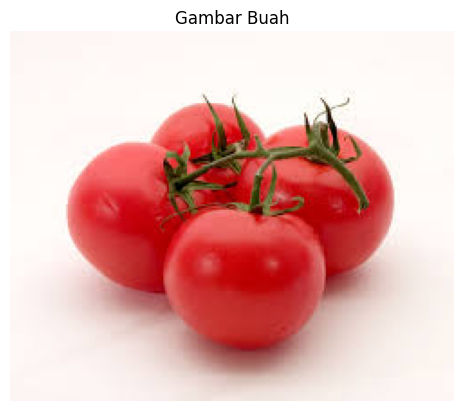

Warna dominan (RGB):
Warna 1: RGB(174, 39, 34)
Warna 2: RGB(250, 241, 238)
Warna 3: RGB(214, 119, 113)


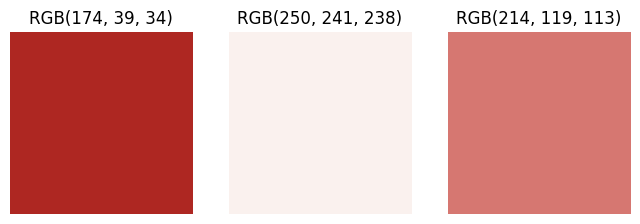

Buah sudah matang: 100.00%
Buah belum matang: 0.00%


In [1]:
# Import pustaka yang diperlukan
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Fungsi untuk mengunggah foto
print("Silakan unggah foto buah:")
uploaded = files.upload()

# Membaca gambar yang diunggah
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Konversi gambar ke format RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar yang diunggah
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Gambar Buah")
plt.show()

# Fungsi untuk mendeteksi warna dominan dan nilai RGB
def detect_dominant_colors(image, k=3):
    # Ubah ukuran gambar untuk mempercepat proses
    resized_image = cv2.resize(image, (image.shape[1] // 10, image.shape[0] // 10))
    pixels = resized_image.reshape(-1, 3)

    # Gunakan KMeans untuk mendeteksi warna dominan
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Ambil nilai warna dominan
    dominant_colors = kmeans.cluster_centers_
    return dominant_colors.astype(int)

# Deteksi warna dominan
dominant_colors = detect_dominant_colors(image_rgb, k=3)

# Tampilkan warna dominan
print("Warna dominan (RGB):")
for i, color in enumerate(dominant_colors):
    print(f"Warna {i+1}: RGB{tuple(color)}")

# Visualisasi warna dominan
plt.figure(figsize=(8, 4))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, len(dominant_colors), i+1)
    plt.imshow([[color / 255]])  # Normalisasi warna ke skala 0-1
    plt.axis('off')
    plt.title(f"RGB{tuple(color)}")
plt.show()

# Fungsi untuk menghitung persentase kematangan berdasarkan warna dominan
def calculate_ripeness(dominant_colors):
    # Asumsi rentang warna RGB untuk kematangan
    # Merah (matang): banyak merah dan lebih sedikit hijau
    # Hijau (belum matang): banyak hijau dan sedikit merah
    ripe_count = 0
    unripe_count = 0

    for color in dominant_colors:
        r, g, b = color
        if r > 150 and g < 100:  # Warna matang (dominan merah)
            ripe_count += 1
        elif g > 150 and r < 100:  # Warna belum matang (dominan hijau)
            unripe_count += 1

    total_colors = ripe_count + unripe_count
    if total_colors == 0:
        return "Tidak dapat menentukan tingkat kematangan", 0

    ripe_percentage = (ripe_count / total_colors) * 100
    unripe_percentage = (unripe_count / total_colors) * 100

    return f"Buah sudah matang: {ripe_percentage:.2f}%\nBuah belum matang: {unripe_percentage:.2f}%", ripe_percentage

# Hitung dan tampilkan persentase kematangan
result, ripeness_percentage = calculate_ripeness(dominant_colors)
print(result)
